# **FLO CUSTOMER SEGMENTATION WITH RFM AND KMEANS**

## business problem

FLO, an online shoe store, wants to segment its customers 
and determine marketing strategies according to these 
segments.

To this end, the behaviors of the customers will be 
defined and groups will be formed according to the 
clusters in these behaviors.

## dataset story

The dataset consists of the information obtained from the past shopping behavior 
of customers who made their last purchases from Flo as OmniChannel (both online and offline shopper) 
between 2020 and 2021.

master_id: Unique client number
order_channel: Which channel of the shopping platform is used (Android, ios, Desktop, Mobile)
last_order_channel: The channel where the last purchase was made
first_order_date: The date of the first purchase made by the customer
last_order_date: The date of the customer's last purchase
last_order_date_online: The date of the last purchase made by the customer on the online platform
last_order_date_offline: The date of the last purchase made by the customer on the offline platform
order_num_total_ever_online: The total number of purchases made by the customer on the online platform
order_num_total_ever_offline: Total number of purchases made by the customer offline
customer_value_total_ever_offline: The total price paid by the customer for offline purchases
customer_value_total_ever_online: The total price paid by the customer for their online shopping
interested_in_categories_12: List of categories the customer has purchased from in the last 12 months

In [1]:
# import libraries
import datetime as dt
from operator import index
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

# making some adjsutments
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# RFM ANALYSIS

## Task 1: Understanding and Preparing the Data

In [2]:
# step 1: reading the dataset
df_ = pd.read_csv('/kaggle/input/flo-customer-segmentation/flo_rfm_analizi_dataset.csv')
df_.columns = [col.lower() for col in df_.columns]
df = df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


In [3]:
# step 2: on the dataset, make the following:
# first 10 observations
# variable names
# descriptive statistics
# null values
# variable types

def check_df(dataframe, head=10):
    print('\n', '#' * 15, 'head'.upper(), '#' * 15)
    print(dataframe.head(head))
    print('\n', '#' * 15, 'tail'.upper(), '#' * 15)
    print(dataframe.tail(head))
    print('\n', '#' * 15, 'variable_names'.upper(), '#' * 15)
    print(dataframe.columns)
    print('\n', '#' * 15, 'nul_values'.upper(), '#' * 15)
    print(dataframe.isnull().sum())
    print('\n', '#' * 15, 'info'.upper(), '#' * 15)
    print(dataframe.info())


check_df(df)


 ############### HEAD ###############
                              master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online       interested_in_categories_12
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30      2021-02-26             2021-02-21              2021-02-26                         4.00                          1.00                             139.99                            799.38                           [KADIN]
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16             2021-02-16              2020-01-10                        19.00                          2.00                             159.97                           1853.58  [ERKEK, COCUK, KADIN, AKTIFSPOR]
2  69b69676-1a40

In [4]:
# step 3: omnichannel means that customers shop from both online and offline platforms. 
# Create new variables for each customer's total shopping numbers and spendings.

df['total_shoping_number'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['total_shoping_price'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_shoping_number,total_shoping_price
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],2.00,209.98


In [5]:
# step 4: examine the variable types. Change the type of variables that express date to "date".
df.dtypes  # gives variable types

# first method
# variable_with_date = [col for col in df.columns if 'date' in col]
# for col in variable_with_date:
#     df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

# second method
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [6]:
# step 5: examine the distribution of the number of customers in the shopping channels,
# the total number of products purchased and the total expenditures.
df.groupby('order_channel').agg({'master_id': len,
                                 'total_shoping_number': sum,
                                 'total_shoping_price': sum})

,master_id,total_shoping_number,total_shoping_price
order_channel,,,
Android App,9495,52269.00,7819062.76
Desktop,2735,10920.00,1610321.46
Ios App,2833,15351.00,2525999.93
Mobile,4882,21679.00,3028183.16


In [7]:
# step 6: rank the top 10 customers with the highest revenue
df.sort_values(by='total_shoping_price', ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_shoping_number,total_shoping_price
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.00,1.00,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.00,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.00,1.00,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.00,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.00,3.00,18119.14,2587.20,[AKTIFSPOR],4.00,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.00,1.00,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.00,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.00,2.00,64.97,12038.18,"[ERKEK, KADIN]",20.00,12103.15


In [8]:
# step 7: list the top 10 customers with the most orders
df.sort_values(by='total_shoping_number', ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_shoping_number,total_shoping_price
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.00,109.00,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.00,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.00,87.00,8432.25,139.98,[ERKEK],88.00,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.00,81.00,3997.55,242.81,[ERKEK],83.00,4240.36
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.00,74.00,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.00,5184.05
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.00,3.00,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.00,5297.88
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57


In [9]:
# step 8: define a function that shows data preparation process
def data_preparation(dataframe, head=10):
    # check the dataframe
    print('\n', '#' * 15, 'head'.upper(), '#' * 15)
    print(dataframe.head(head))
    print('\n', '#' * 15, 'tail'.upper(), '#' * 15)
    print(dataframe.tail(head))
    print('\n', '#' * 15, 'variable_names'.upper(), '#' * 15)
    print(dataframe.columns)
    print('\n', '#' * 15, 'nul_values'.upper(), '#' * 15)
    print(dataframe.isnull().sum())
    print('\n', '#' * 15, 'info'.upper(), '#' * 15)
    print(dataframe.info())

    # Create new variables for each customer's total shopping numbers and spendings
    dataframe['total_shoping_number'] = dataframe['order_num_total_ever_online'] + dataframe[
        'order_num_total_ever_offline']
    dataframe['total_shoping_price'] = dataframe['customer_value_total_ever_offline'] + dataframe[
        'customer_value_total_ever_online']

    # examine the variable types. change the type of variables that express date to "date"
    print(dataframe.dtypes)  # gives variable types
    date_columns = dataframe.columns[dataframe.columns.str.contains("date")]
    dataframe[date_columns] = dataframe[date_columns].apply(pd.to_datetime)
    print(dataframe.dtypes)

    # rank the top 10 customers with the highest revenue
    print(dataframe.sort_values(by='total_shoping_price', ascending=False).head(head))

    # list the top 10 customers with the most orders
    print(dataframe.sort_values(by='total_shoping_number', ascending=False).head(head))

    # examine the distribution of the number of customers in the shopping channels,
    # the total number of products purchased and the total expenditures.
    print(dataframe.groupby('order_channel').agg({'master_id': len,
                                 'total_shoping_number': sum,
                                 'total_shoping_price': sum}))

df = df_.copy()
new_df = data_preparation(df)


 ############### HEAD ###############
                              master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online       interested_in_categories_12
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30      2021-02-26             2021-02-21              2021-02-26                         4.00                          1.00                             139.99                            799.38                           [KADIN]
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16             2021-02-16              2020-01-10                        19.00                          2.00                             159.97                           1853.58  [ERKEK, COCUK, KADIN, AKTIFSPOR]
2  69b69676-1a40

## Task 2: Calculating RFM Metrics


In [10]:
# Step 1: Define Recency, Frequency and Monetary
"""
Recency: This value represents the last time the customer shopped from the company.
Frequency: This value represents the total number of purchases made by the customer, that is, the number of transactions.
Monetary: This value represents the monetary value that the customer leaves to the company.
"""

'\nRecency: This value represents the last time the customer shopped from the company.\nFrequency: This value represents the total number of purchases made by the customer, that is, the number of transactions.\nMonetary: This value represents the monetary value that the customer leaves to the company.\n'

In [11]:
# Step 2: Calculate Recency, Frequency and Monetary metrics for the customer
df['last_order_date'].max()
today_date = dt.datetime(2021, 6, 1)
type(today_date)

(today_date - df['last_order_date']).dt.days    # recency
df['total_shoping_number']                      # frequency
df['total_shoping_price']                       # monetary


0        939.37
1       2013.55
2        585.32
3        121.97
4        209.98
          ...  
19940    401.96
19941    390.47
19942    632.94
19943   1009.77
19944    261.97
Name: total_shoping_price, Length: 19945, dtype: float64

In [12]:
# Step 3: Assign your calculated metrics to a variable named rfm
rfm = pd.DataFrame()
rfm['master_id'] = df['master_id']
rfm['recency'] = (today_date - df['last_order_date']).dt.days
rfm['frequency'] = df['total_shoping_number']
rfm['monetary'] = df['total_shoping_price']
rfm.shape
rfm.head()

,master_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98


In [13]:
# Step 4: Change the names of the metrics you created to recency, frequency and monetary
rfm[rfm['monetary'] < 0]  # it returns a null list. therefore, there is no value lower than zero
rfm.describe().T
rfm.head()

,master_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98


## Task 3: Calculating RFM Scores

In [14]:
# Step 1: Convert the Recency, Frequency and Monetary metrics to scores between 1-5 with the help of qcut
pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])


0        4
1        5
2        3
3        1
4        1
        ..
19940    2
19941    2
19942    3
19943    4
19944    1
Name: monetary, Length: 19945, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [15]:
# Step 2: Record these scores as recency_score, frequency_score and monetary_score
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [16]:
# Step 3: Express recency_score and frequency_score as a single variable and save it as RF_SCORE
rfm['rf_score'] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,3,1,1,31


In [17]:
rfm[rfm['rf_score'] == '55'].head()  # it returns champions class
rfm[rfm['rf_score'] == '11'].head()  # it returns hibernatings
rfm['rf_score'].value_counts().sum()

19945

## Task 4: Defining rfm score as segment

In [18]:
# Step 1: Make segment definitions for the generated RF scores
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_loose_them',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [19]:
# Step 2: Convert the scores into segments with the help of the seg_map below
rfm['segment'] = rfm['rf_score'].replace(seg_map, regex=True)
rfm.head(10)

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,3,4,4,34,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,3,5,5,35,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,2,4,3,24,at_risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,3,1,1,31,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,3,1,1,31,about_to_sleep
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,80,3.00,200.86,4,2,1,42,potential_loyalists
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,226,4.00,375.93,2,3,2,23,at_risk
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,293,2.00,163.63,1,1,1,11,hibernating
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,86,5.00,1054.69,3,4,5,34,loyal_customers
9,1143f032-440d-11ea-8b43-000d3a38a36f,240,2.00,165.96,1,1,1,11,hibernating


## Task 5: Action time

In [20]:
# Step 2: With the help of RFM analysis, find the customers in the relevant profile for the 2 cases given below 
# and save the customer IDs as csv.
# Step 2a. FLO includes a new women's shoe brand.
# The product prices of the brand it includes are above the general customer preferences.
# For this reason, it is desired to contact the customers in the profile that will be interested
# in the promotion of the brand and product sales. Those who shop from their loyal customers
# (champions, loyal_customers) and women category are the customers to be contacted specifically.
# Save the id numbers of these customers to the csv file.
rfm = rfm.reset_index()
df1 = df[['master_id', 'interested_in_categories_12']]
df_new = pd.merge(rfm, df1, on='master_id')

loyal_woman_df = df_new.loc[((df_new['segment'] == 'champions') | (df_new['segment'] == 'loyal_customers')) &
                            (df_new['interested_in_categories_12'].str.contains('KADIN')), 'master_id']

loyal_woman_df

0        cc294636-19f0-11eb-8d74-000d3a38a36f
1        f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8        cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11       c2e15af2-9eed-11e9-9897-000d3a38a36f
33       fb840306-1219-11ea-a001-000d3a38a36f
                         ...                 
19912    f63aba0e-41d8-11ea-96d9-000d3a38a36f
19913    81d0da04-a53e-11e9-a2fc-000d3a38a36f
19914    825e6b00-ab40-11e9-a2fc-000d3a38a36f
19917    f8c471c8-2596-11eb-81e9-000d3a38a36f
19926    7e1c15be-6298-11ea-9861-000d3a38a36f
Name: master_id, Length: 2497, dtype: object

In [21]:
# Step 2b. Nearly 40% discount is planned for Men's and Children's products.
# It is aimed to specifically target customers who are good customers in the past,
# but who have not shopped for a long time, who are interested in the categories related to this discount,
# who should not be lost, who are asleep and new customers. Save the ids of the customers in the appropriate
# profile to the csv file.
men_child_segment = df_new.loc[
    ((df_new['segment'] == 'cant_loose_them') |
     (df_new['segment'] == 'hibernating') |
     (df_new['segment'] == 'new_customers')) &
    ((df_new['interested_in_categories_12'].str.contains('ERKEK')) |
     (df_new['interested_in_categories_12'].str.contains('COCUK'))), 'master_id']

men_child_segment

7        3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f
10       ae608ece-c9d8-11ea-a31e-000d3a38a36f
15       13ed97a4-b167-11e9-89fa-000d3a38a36f
19       2730793e-3908-11ea-85d6-000d3a38a36f
21       7b289956-d691-11e9-93bc-000d3a38a36f
                         ...                 
19910    7ab86f3e-b244-11ea-b736-000d3a38a36f
19928    8ef8cfc4-606f-11ea-8dd8-000d3a38a36f
19932    13a5e98c-a824-11e9-a2fc-000d3a38a36f
19933    6d285c64-5e73-11ea-be5b-000d3a38a36f
19936    1982ac0e-9f4c-11e9-9897-000d3a38a36f
Name: master_id, Length: 2771, dtype: object

# KMEANS CLUSTERING

In [22]:
# defining a new dataframe to cluster with K-Means
rfm_cluster = df_new[['monetary', 'frequency', 'recency']]
rfm_cluster.head()

,monetary,frequency,recency
0,939.37,5.00,95
1,2013.55,21.00,105
2,585.32,5.00,186
3,121.97,2.00,135
4,209.98,2.00,86


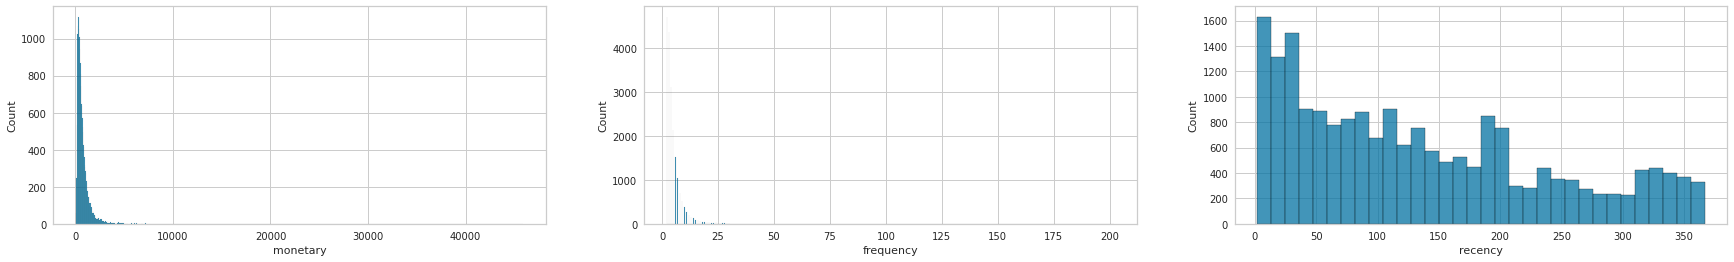

In [23]:
# showing the distribution of rfm metrics
plt.figure(figsize=(30, 4))
plt.subplot(1, 3, 1)
sns.histplot(rfm_cluster['monetary'])
plt.subplot(1, 3, 2)
sns.histplot(rfm_cluster['frequency'])
plt.subplot(1, 3, 3)
sns.histplot(rfm_cluster['recency'])
plt.show(block=True)

In [24]:
# standardization of the dataframe
mms = MinMaxScaler((0, 1)).fit_transform(rfm_cluster)
rfm_cluster_scaled = pd.DataFrame(mms)
rfm_cluster_scaled.head()

,0,1,2
0,0.02,0.02,0.25
1,0.04,0.10,0.28
2,0.01,0.02,0.50
3,0.00,0.00,0.36
4,0.00,0.00,0.23


In [25]:
# get the descriprive statistics of new dataframe
rfm_cluster_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,19945.00,0.02,0.02,0.00,0.01,0.01,0.02,1.00
1,19945.00,0.02,0.02,0.00,0.00,0.01,0.02,1.00
2,19945.00,0.36,0.28,0.00,0.11,0.30,0.55,1.00


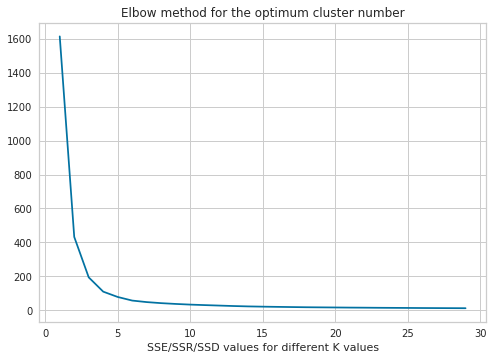

In [26]:
# determination of the optimum cluster number using elbow method
kmeans = KMeans()
ssd = []
K = range(1, 30)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(rfm_cluster_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, 'bx-')
plt.xlabel('SSE/SSR/SSD values for different K values')
plt.title('Elbow method for the optimum cluster number')
plt.show(block=True)

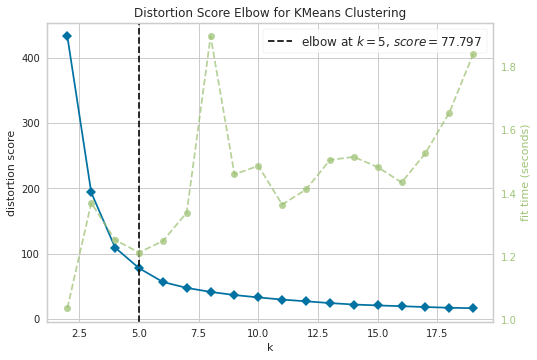

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# # determining the optimal cluster number
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(rfm_cluster_scaled)
elbow.poof()

In [28]:
silhouette_score_list = []
for i in range(2, 10):
    kmeans.fit(rfm_cluster_scaled)
    silhouette_score_list.append(silhouette_score(rfm_cluster_scaled, kmeans.labels_))
print(silhouette_score_list)

[0.4197349577944555, 0.4159550774138846, 0.4173854892678361, 0.41902315429749554, 0.42037338677052216, 0.3970837598256457, 0.4180556807396257, 0.41895203717921825]


In [29]:
# kmeans using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=elbow.elbow_value_, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(rfm_cluster_scaled)
pred = kmeans.predict(rfm_cluster_scaled)

In [30]:
# adding clusters within the dataframe
dataframe = pd.DataFrame(rfm_cluster)
dataframe['cluster'] = pred
dataframe['cluster'] = dataframe['cluster'] + 1
dataframe.head()

,monetary,frequency,recency,cluster
0,939.37,5.00,95,3
1,2013.55,21.00,105,3
2,585.32,5.00,186,5
3,121.97,2.00,135,3
4,209.98,2.00,86,3


In [31]:
# get the average values of the variables according to the cluster
dataframe.groupby('cluster').mean()

,monetary,frequency,recency
cluster,,,
1,902.50,5.72,28.98
2,651.56,4.67,248.22
3,727.45,5.03,100.53
4,574.05,4.11,330.06
5,686.46,4.58,176.95


In [32]:
# reaching the average scores and counts of recency, frequency, monetary in those classes
dataframe[['cluster', 'recency', 'frequency', 'monetary']].groupby('cluster').agg(['mean', 'count'])

recency       frequency       monetary      
           mean count      mean count     mean count
cluster                                             
1         28.98  6605      5.72  6605   902.50  6605
2        248.22  2119      4.67  2119   651.56  2119
3        100.53  5057      5.03  5057   727.45  5057
4        330.06  2386      4.11  2386   574.05  2386
5        176.95  3778      4.58  3778   686.46  3778